## Metoda Monte Carlo - estymacja wartości liczby pi
Łucja Adamska 415028

In [63]:
## import potrzebnych pakietów
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

### Funkcja MonteCarlo do generowania punktów losowych na kwadracie (0,0; 1,1) i ich klasyfikacji
- Parametry: ilość punktów do wygenerowania, wartość ziarna losowania

- Funkcja zwraca: obiekt DataFrame z współrzędnymi punktów i informacją, gdzie znajdują się względem wykresu funkcji okręgu o promieniu r=1 oraz wyestymowaną wartość liczby pi


In [64]:
def MonteCarlo(n, seed=18):
    random.seed(seed)
    k = 0
    df = pd.DataFrame()
    x_arr = []
    y_arr = []
    location = []
       
    for _ in range(n):
        x = random.uniform(0, 1) # losowanie punktów z rozkładu jednostajnego
        y = random.uniform(0, 1) 
        if x**2 + y**2 <= 1:  # sprawdzenie lokalizacji punktu
            k += 1
            location.append('under') 
        else:
            location.append('over')
        x_arr.append(x)
        y_arr.append(y)

    df['X'] = x_arr
    df['Y'] = y_arr
    df['location'] = location 
    pi = 4 * k / n # stosunek pola ćwiartki koła do pola kwadratu powninien wynosić pi/4 -> stąd wartość pi wyliczana jest z równania
    return pi,df

### Wizualizacja dla N=100,1000,10000,100000

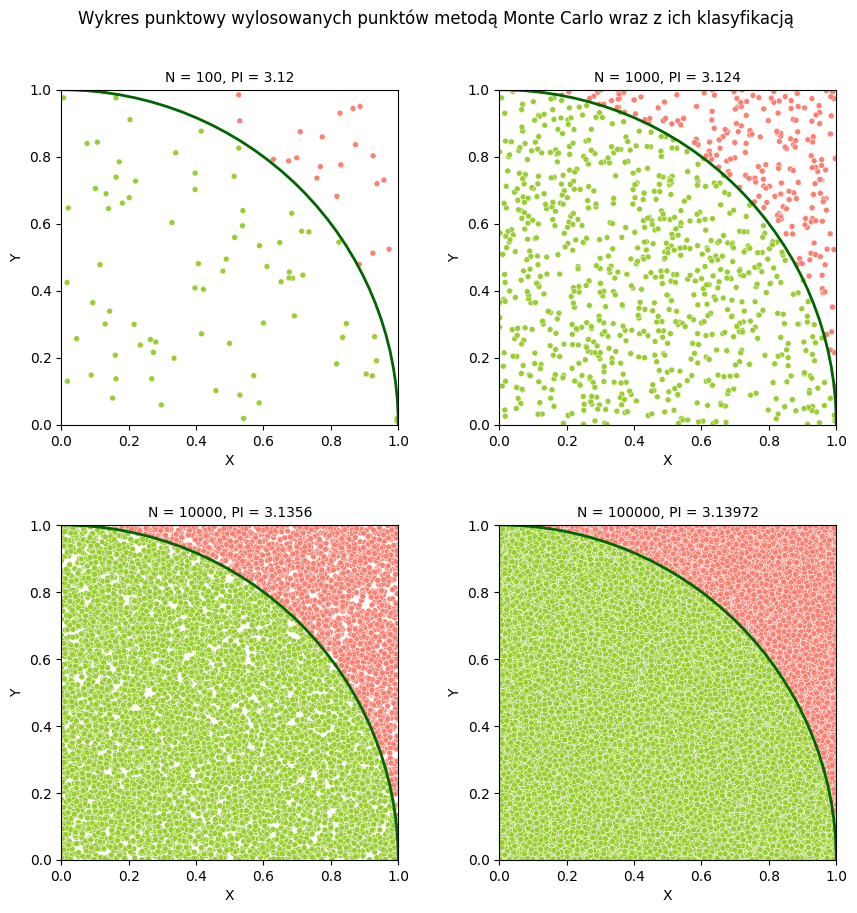

In [65]:
fig,axes = plt.subplots(2,2,figsize=(10,10))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

for i in range(2, 6):
    n = 10 ** i
    pi, df = MonteCarlo(n,18)
    sns.scatterplot(data=df, x='X', y='Y', hue='location', legend=False, size=1, ax=axes[(i-2)//2][(i-2)%2], palette={'under': 'yellowgreen', 'over': 'salmon'})
    circle = plt.Circle((0, 0), 1, color='darkgreen', fill=False, linestyle='-', linewidth=2)
    axes[(i-2)//2][(i-2)%2].add_patch(circle)
    axes[(i-2)//2][(i-2)%2].set_xlim([0, 1])
    axes[(i-2)//2][(i-2)%2].set_ylim([0, 1])
    axes[(i-2)//2][(i-2)%2].set_title(f"N = {n}, PI = {pi}", fontsize=10)
fig.suptitle('Wykres punktowy wylosowanych punktów metodą Monte Carlo wraz z ich klasyfikacją', y=0.96, fontsize = 12)
plt.show()

#### WNIOSKI
- Wraz ze wzrostem liczby losowanych punktów, maleje błąd powierzchni pod wykresem, czyli estymowana wartość zbliża się do faktycznej 

### Estymacja wartości liczby pi dla różnych wartości ziaren 
- Redefiniuję funkcję MonteCarlo, w celu uzyskania chwilowej wartości liczby pi

In [66]:
def MonteCarlo(n,seed = 42):
    random.seed(seed)
    k = 0
    N = 0
    df = pd.DataFrame()
    pi_arr = []
    for _ in range(n):
        x = random.uniform(0, 1)
        y = random.uniform(0, 1)
        
        if x**2 + y**2 <= 1:
            k += 1
        N += 1
        pi = 4 * k / N # obliczyamy chwilową wartość estymowaną PI
        pi_arr.append(pi)

    df['PI'] = pi_arr
    return df

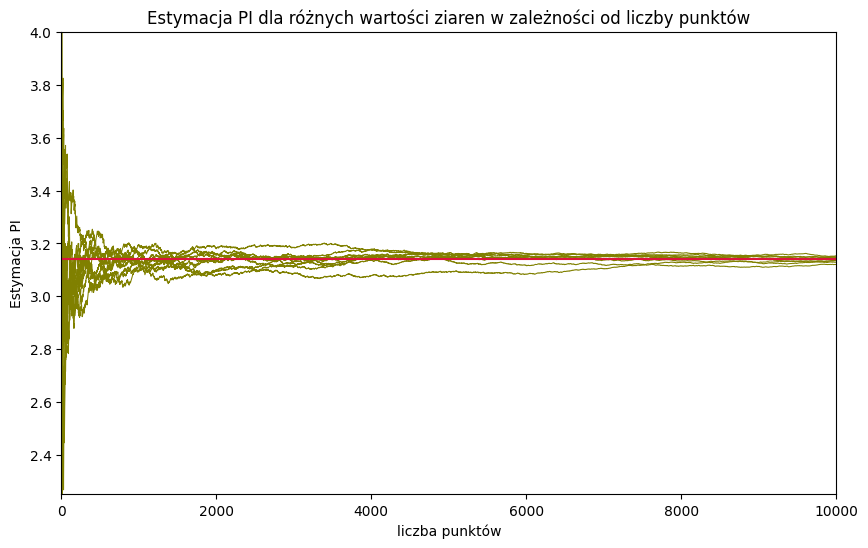

In [67]:
seeds = range(10)
n = 10000
fig,ax = plt.subplots(figsize=(10, 6))
for seed in seeds:
    df = MonteCarlo(10000, seed)
    sns.lineplot(data=df, x=df.index, y='PI',color='olive',size=0.5,legend=False)

plt.xlabel('liczba punktów')
plt.ylabel('Estymacja PI')
plt.title(f'Estymacja PI dla różnych wartości ziaren w zależności od liczby punktów')
ax.axhline(y=3.14159, color='crimson', linestyle='-', label='PI')
plt.ylim(2.25, 4)
plt.xlim(0, n)
plt.show()

#### WNIOSKI 
- ponownie, wraz ze wzrostem liczby punktów wartość estymowanej liczby pi zbliża się do faktycznej
- w zależności od wartości ziarna zmienia się ścieżka dążenia do pi

## Estymacja wartości liczby pi - wykres pudełkowy

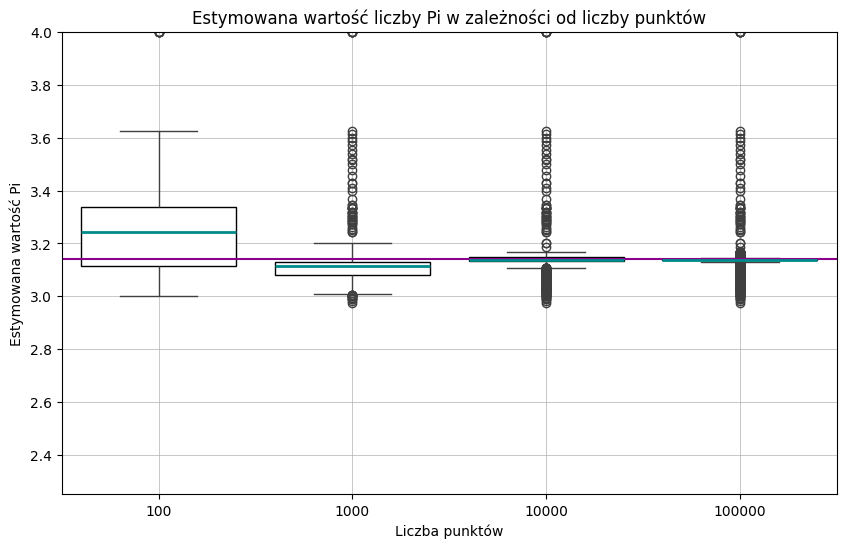

In [68]:
n_values = [10**i for i in range(2, 6)]  
results = []

# Uruchomienie Monte Carlo dla różnych rozmiarów próbek
for n in n_values:
    df = MonteCarlo(n,18)
    df['n_value'] = n
    results.append(df)

all_results = pd.concat(results)

# Wizualizacja za pomocą boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='n_value', y='PI', data=all_results, boxprops=dict(facecolor='white', linewidth=1, edgecolor='black'),medianprops=dict(color='darkcyan', linewidth=2))
plt.ylim(2.25,4)
plt.axhline(y=3.14159, color='darkmagenta', linestyle='-', label='PI')
plt.title('Estymowana wartość liczby Pi w zależności od liczby punktów')
plt.grid(True, which='both', linestyle='-', linewidth=0.5)
plt.xlabel('Liczba punktów')
plt.ylabel('Estymowana wartość Pi')
plt.show()

## Poprawa jakości estymacji wraz ze wzrostem N
- w celu wizualizacji dodaję do poprzedniej wersji funkcji label: seria, żeby w łatwy sposób stworzyć wykresy pudełkowe dla kolejnych eksperymentów

In [69]:
def MonteCarlo(n,seed = 18,seria = 1):
    random.seed(seed)
    k = 0
    N = 0
    df = pd.DataFrame()
    pi_arr = []
    for _ in range(n):
        x = random.uniform(0, 1)
        y = random.uniform(0, 1)
        
        if x**2 + y**2 <= 1:
            k += 1
        N += 1
        pi = 4 * k / N
        pi_arr.append(pi)

    df['PI'] = pi_arr
    df['seria'] = seria
    return df

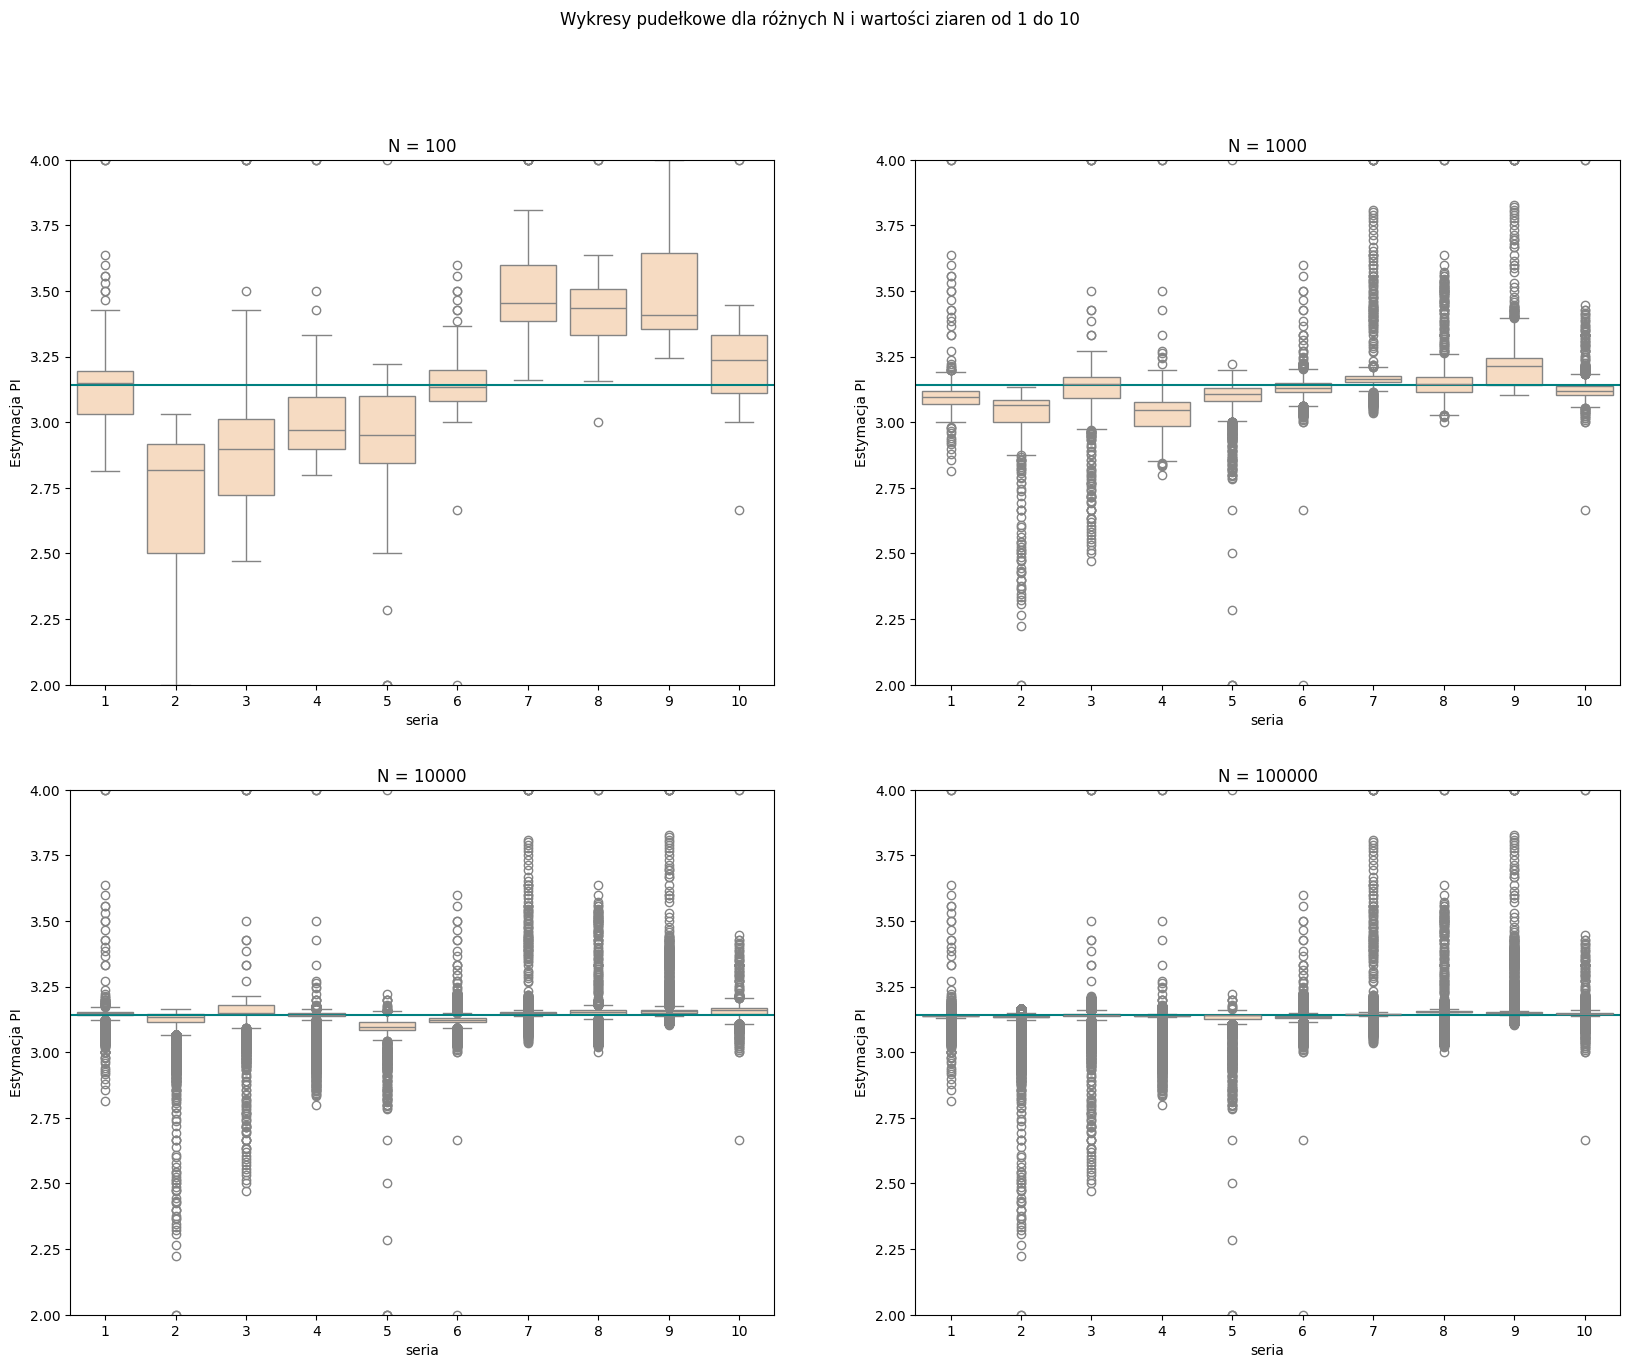

In [70]:
fig,ax = plt.subplots(2,2,figsize=(20,15))
serie = [i for i in range(1,11)]
for i in range(2, 6):
    n = 10 ** i
    df = pd.DataFrame()
    for seria in serie:
        df_to_add = MonteCarlo(n,seria,seria)
        df = pd.concat([df,df_to_add])
    sns.boxplot(data=df,x = 'seria',y= 'PI',ax=ax[(i-2)//2][(i-2)%2],color='peachpuff')
    ax[(i-2)//2][(i-2)%2].set_ylim([2, 4])
    ax[(i-2)//2][(i-2)%2].set_ylabel('Estymacja PI')
    ax[(i-2)//2][(i-2)%2].axhline(y=3.14159, color='teal', linestyle='-', label='PI')
    ax[(i-2)//2][(i-2)%2].set_title(f"N = {n}")
fig.suptitle('Wykresy pudełkowe dla różnych N i wartości ziaren od 1 do 10')
plt.show()

#### WNIOSKI 
- Niezależnie od ziarna dla N = 100000, większość chwilowych estymacji jest bardzo zbliżona do faktycznej wartości PI.
- Dla N = 100 oraz N = 1000 ziarno ma umiarkowany wpływ na estymację
- Dla N = 10000 oraz N = 100000 wartość ziarna zmniejsza swoje znaczenie
- Potwierdza to poprawę jakości estymacji wraz ze wzrostem N.